In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline
plt.rcParams['figure.dpi']=70
plt.rcParams['savefig.dpi']=300

In [3]:
import seaborn as sns
#settings
sns.set_style('whitegrid')
sns.set(rc={"figure.dpi":70, "savefig.dpi":300})
sns.set_context("notebook")

In [4]:
#1. Combine paper and author datasets
#2. Look at the shape and run some tests on it
#3. Look at EPA sent by Chen
#4. How can you create a graph before Friday?!?!?!?!?!?!? PRESENTATION

In [25]:
data0 = pd.read_csv("DATA.csv")

In [26]:
data0.columns

Index(['entity_id', 'entity_type', 'appearsInJournal', 'rank_P',
       'referenceCount_P', 'appearsInConferenceInstance', 'citationCount_P',
       'entity_idF', 'fos_list', 'dcterms_creator', 'entity_id_A', 'rank_A',
       'paperCount_A', 'citationCount_A', 'isPartOf', 'owl#start', 'owl#end',
       'pageCount_C', 'citationCount_CI', 'entity_id_C', 'rank_C',
       'paperCount_C', 'citationCount_CS', 'entity_id_CS', 'rank_J',
       'paperCount_J', 'citationCount_J', 'entity_id_J'],
      dtype='object')

In [27]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412393 entries, 0 to 412392
Data columns (total 28 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   entity_id                    412393 non-null  int64  
 1   entity_type                  210627 non-null  object 
 2   appearsInJournal             157662 non-null  float64
 3   rank_P                       412393 non-null  int64  
 4   referenceCount_P             412393 non-null  int64  
 5   appearsInConferenceInstance  4647 non-null    float64
 6   citationCount_P              412393 non-null  int64  
 7   entity_idF                   412393 non-null  int64  
 8   fos_list                     412393 non-null  object 
 9   dcterms_creator              412393 non-null  float64
 10  entity_id_A                  412393 non-null  float64
 11  rank_A                       412393 non-null  float64
 12  paperCount_A                 412393 non-null  float64
 13 

In [28]:
#data.isnull().sum()

In [29]:
data_corr = data0[data0.columns[[0,3,4,6,8,9,11,12,13]]]
#data_corr = data_corr.groupby(['entity_id']).apply(lambda group: ','.join(group[['dcterms_creator','rank_A','paperCount_A','citationCount_A','Cite_per_P']]))

#for i, j in data_corr.iterrows():
#    if i == 'rank_A':
#        j = j.mean
data_corr.head()
#data_corr.corr()

,entity_id,rank_P,referenceCount_P,citationCount_P,fos_list,dcterms_creator,rank_A,paperCount_A,citationCount_A
0,6320,24657,1,0,Medicine,2.700171e+09,21021.0,45.0,792.0
1,6320,24657,1,0,Medicine,2.700171e+09,21021.0,45.0,792.0
2,6320,24657,1,0,Medicine,2.700171e+09,21021.0,45.0,792.0
3,139580,24050,5,0,Medicine,1.852443e+09,21075.0,328.0,5818.0
4,139580,24050,5,0,Medicine,1.852443e+09,21075.0,328.0,5818.0


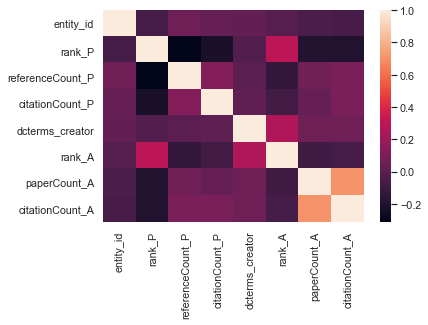

In [30]:
sns.heatmap(data_corr.corr());
#plt.title("Correlations Heatmap")

# Find PAPER Stats

In [31]:
paper0 = data0[data0.columns[[0,3,4,6,8,9,11,12,13]]]
paper = paper0.drop_duplicates(['entity_id','dcterms_creator'], keep='first')

paper.head()

,entity_id,rank_P,referenceCount_P,citationCount_P,fos_list,dcterms_creator,rank_A,paperCount_A,citationCount_A
0,6320,24657,1,0,Medicine,2.700171e+09,21021.0,45.0,792.0
3,139580,24050,5,0,Medicine,1.852443e+09,21075.0,328.0,5818.0
11,186380,23892,0,3,Medicine,2.095945e+09,19655.0,3.0,7.0
12,186380,23892,0,3,Medicine,2.137510e+09,19655.0,3.0,7.0
13,186380,23892,0,3,Medicine,2.142913e+09,18821.0,8.0,10.0


In [117]:
reference0 = data.groupby(data.dcterms_creator).sum()
reference = reference0[reference0.columns[[2]]]
reference.head()
reference.to_csv("reference.csv")

In [32]:
Paper_Auth_Num = paper['entity_id'].value_counts().rename_axis('entity_id').reset_index(name='Paper_Auth_Num')
Paper_Auth_Num.head()

,entity_id,Paper_Auth_Num
0,5889370,374
1,245130620,151
2,6392330,104
3,607077360,91
4,94870250,64


In [33]:
data = pd.merge(paper,Paper_Auth_Num,how="left")

In [34]:
data['Cite_per_P'] = data.citationCount_A / data.paperCount_A

In [35]:
print(data.shape)
data.head()

(117363, 11)


,entity_id,rank_P,referenceCount_P,citationCount_P,fos_list,dcterms_creator,rank_A,paperCount_A,citationCount_A,Paper_Auth_Num,Cite_per_P
0,6320,24657,1,0,Medicine,2.700171e+09,21021.0,45.0,792.0,1,17.600000
1,139580,24050,5,0,Medicine,1.852443e+09,21075.0,328.0,5818.0,1,17.737805
2,186380,23892,0,3,Medicine,2.095945e+09,19655.0,3.0,7.0,11,2.333333
3,186380,23892,0,3,Medicine,2.137510e+09,19655.0,3.0,7.0,11,2.333333
4,186380,23892,0,3,Medicine,2.142913e+09,18821.0,8.0,10.0,11,1.250000


In [36]:
fos = data[data.columns[[0,4]]]
fos.head()

,entity_id,fos_list
0,6320,Medicine
1,139580,Medicine
2,186380,Medicine
3,186380,Medicine
4,186380,Medicine


In [37]:
paper_data0 = data.groupby(data.entity_id).mean()
paper_data0.head()

,rank_P,referenceCount_P,citationCount_P,dcterms_creator,rank_A,paperCount_A,citationCount_A,Paper_Auth_Num,Cite_per_P
entity_id,,,,,,,,,
6320,24657,1,0,2.700171e+09,21021.0,45.0,792.0,1,17.600000
40690,27152,0,0,2.212853e+09,21075.0,1.0,0.0,1,0.000000
47840,23416,0,1,2.151890e+09,14571.0,268.0,2701.0,1,10.078358
139580,24050,5,0,1.852443e+09,21075.0,328.0,5818.0,1,17.737805
184210,25659,0,0,2.634262e+09,20381.0,2.0,0.0,1,0.000000


In [96]:
paper_data0 = data.groupby(data.entity_id).mean()
paper_data = pd.merge(paper_data0,fos,how='left',on=['entity_id','entity_id'])
paper_data = paper_data.drop_duplicates(['entity_id','dcterms_creator'], keep='first')
paper_data.head(10)

,entity_id,rank_P,referenceCount_P,citationCount_P,dcterms_creator,rank_A,paperCount_A,citationCount_A,Paper_Auth_Num,Cite_per_P,fos_list
0,6320,24657,1,0,2.700171e+09,21021.000000,45.000000,792.000000,1,17.600000,Medicine
1,40690,27152,0,0,2.212853e+09,21075.000000,1.000000,0.000000,1,0.000000,Biology
2,47840,23416,0,1,2.151890e+09,14571.000000,268.000000,2701.000000,1,10.078358,Materials science
3,139580,24050,5,0,1.852443e+09,21075.000000,328.000000,5818.000000,1,17.737805,Medicine
4,184210,25659,0,0,2.634262e+09,20381.000000,2.000000,0.000000,1,0.000000,Physics
5,186380,23892,0,3,2.292552e+09,19737.818182,3.363636,7.000000,11,2.356061,Medicine
16,211120,22745,0,4,2.327560e+09,19086.000000,22.000000,272.333333,3,6.880208,Medicine
19,218420,25880,0,0,2.140634e+09,21075.000000,3.000000,2.000000,1,0.666667,Medicine
20,268680,24069,0,0,2.566327e+09,19641.500000,49.250000,338.250000,4,6.220615,Computer science
24,272420,22363,101,9,2.271969e+09,18602.600000,25.800000,638.200000,5,23.544987,Medicine


In [39]:
paper_data["Paper_Auth_Num"].unique()

array([  1,  11,   3,   4,   5,   2,   8,   7,   6,  14,  10,   9, 374,
       104,  15,  12,  18,  19,  13,  37,  22,  21,  20,  16,  17,  64,
        23,  39,  24, 151,  28,  27,  30,  91,  45,  51,  32,  44,  46,
        25,  26,  56], dtype=int64)

In [40]:
paper_data.corr()["Paper_Auth_Num"]

entity_id           0.019416
rank_P             -0.190427
referenceCount_P    0.087791
citationCount_P     0.028637
dcterms_creator     0.037210
rank_A             -0.134175
paperCount_A        0.092927
citationCount_A     0.103549
Paper_Auth_Num      1.000000
Cite_per_P          0.091536
Name: Paper_Auth_Num, dtype: float64

In [41]:
paper_G = paper_data[(paper_data.Paper_Auth_Num <= 50)]

In [42]:
paper_G.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55911 entries, 0 to 117362
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   entity_id         55911 non-null  int64  
 1   rank_P            55911 non-null  int64  
 2   referenceCount_P  55911 non-null  int64  
 3   citationCount_P   55911 non-null  int64  
 4   dcterms_creator   55911 non-null  float64
 5   rank_A            55911 non-null  float64
 6   paperCount_A      55911 non-null  float64
 7   citationCount_A   55911 non-null  float64
 8   Paper_Auth_Num    55911 non-null  int64  
 9   Cite_per_P        55911 non-null  float64
 10  fos_list          55911 non-null  object 
dtypes: float64(5), int64(5), object(1)
memory usage: 5.1+ MB


In [43]:
paper_Gc = paper_G[paper_G.columns[[1,2,3,5,6,7,8,10]]]
print("Correlation for Number of Authors")
print(paper_Gc.corr()["Paper_Auth_Num"])
print("\nCorrelation for Paper Rank")
paper_Gc.corr()["rank_P"]

Correlation for Number of Authors
rank_P             -0.260685
referenceCount_P    0.123457
citationCount_P     0.041057
rank_A             -0.186841
paperCount_A        0.083905
citationCount_A     0.112847
Paper_Auth_Num      1.000000
Name: Paper_Auth_Num, dtype: float64

Correlation for Paper Rank


rank_P              1.000000
referenceCount_P   -0.281060
citationCount_P    -0.158335
rank_A              0.294742
paperCount_A       -0.180774
citationCount_A    -0.220575
Paper_Auth_Num     -0.260685
Name: rank_P, dtype: float64

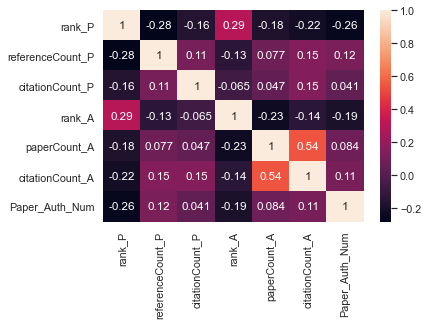

In [97]:
sns.heatmap(paper_Gc.corr(), annot=True);

In [98]:
paper_Gc.head()

,rank_P,referenceCount_P,citationCount_P,rank_A,paperCount_A,citationCount_A,Paper_Auth_Num,fos_list
0,24657,1,0,21021.0,45.0,792.0,1,Medicine
1,27152,0,0,21075.0,1.0,0.0,1,Biology
2,23416,0,1,14571.0,268.0,2701.0,1,Materials science
3,24050,5,0,21075.0,328.0,5818.0,1,Medicine
4,25659,0,0,20381.0,2.0,0.0,1,Physics


In [109]:
print("Correlations for Paper Rank")
paper_Gc.corr()['rank_A']

Correlations for Paper Rank


rank_P              0.294742
referenceCount_P   -0.134631
citationCount_P    -0.065046
rank_A              1.000000
paperCount_A       -0.231985
citationCount_A    -0.140635
Paper_Auth_Num     -0.186841
Name: rank_A, dtype: float64

In [110]:
correlations = paper_Gc.groupby('fos_list')[['rank_P','Paper_Auth_Num']].corr().unstack().iloc[:,1]
correlations

fos_list
Art                     -0.144758
Biology                 -0.240050
Business                -0.291931
Chemistry               -0.241480
Computer science        -0.218490
Economics               -0.223040
Engineering             -0.050264
Environmental science   -0.262672
Geography               -0.227964
Geology                 -0.314814
History                 -0.202345
Materials science       -0.247520
Mathematics             -0.202544
Medicine                -0.254143
Philosophy              -0.144175
Physics                 -0.141048
Political science       -0.249624
Psychology              -0.176784
Sociology               -0.321348
Name: (rank_P, Paper_Auth_Num), dtype: float64

In [111]:
corr = pd.DataFrame(correlations)
corr.index.names = ['Fields of Study']
corr

,rank_P
,Paper_Auth_Num
Fields of Study,
Art,-0.144758
Biology,-0.240050
Business,-0.291931
Chemistry,-0.241480
Computer science,-0.218490
Economics,-0.223040
Engineering,-0.050264
Environmental science,-0.262672


In [94]:
ax = sns.heatmap(corr, xticklabels=corr.index,
                      cmap='RdYlGn', cbar=False, center=0.00, annot=True,
                      fmt ='0.2f', ax=ax)

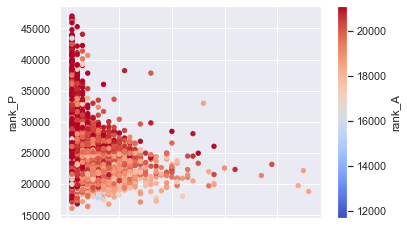

In [74]:
#It looks like an Author's Rank correlates with a Paper's Rank

ax_p = paper_G.plot.scatter(x="Paper_Auth_Num", y="rank_P", c="rank_A",cmap='coolwarm')

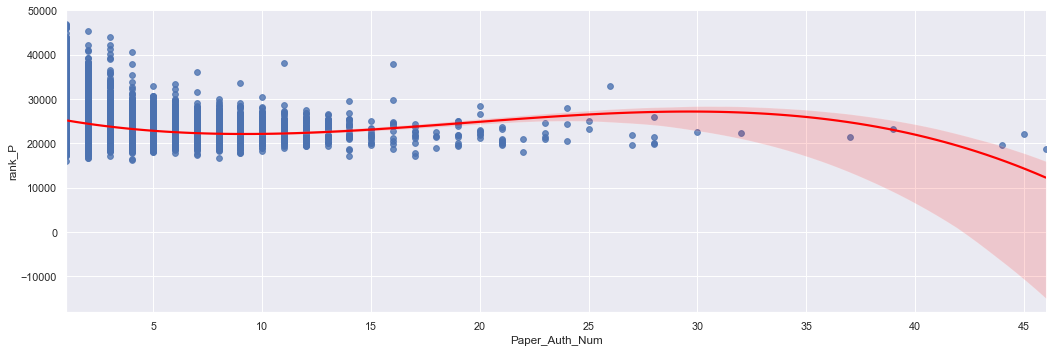

In [48]:
sns.lmplot(x='Paper_Auth_Num',y='rank_P',aspect=3,data=paper_G,ci=95,order=3,fit_reg=True,line_kws={'color': 'red'});  
#hue='fos_list',

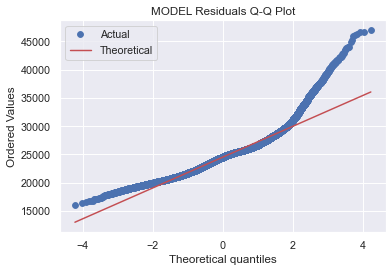

In [49]:
from scipy import stats
stats.probplot(paper_G.rank_P, dist="norm", plot= plt);
plt.title("MODEL Residuals Q-Q Plot")
plt.legend(['Actual','Theoretical'])
#Follows a Logistic Distribution

[-0.01628037 10.13566319]


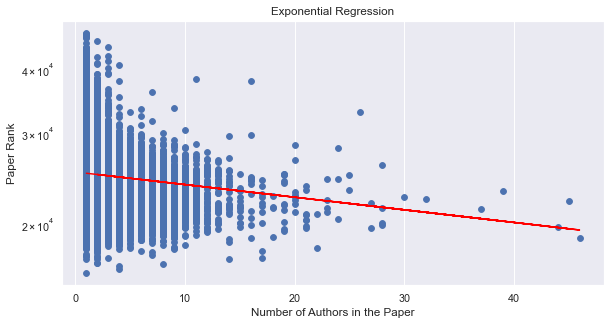

In [95]:
import math as m
fit = np.polyfit(paper_G.Paper_Auth_Num, np.log(paper_G.rank_P), 1)
print(fit)

y = []
for x in paper_G.Paper_Auth_Num.unique():
    value = m.exp(10.13566319) * m.exp(-0.005628037)**x
    y.append(value)

fig = plt.figure(figsize = (10, 5))
plt.scatter(paper_G.Paper_Auth_Num,paper_G.rank_P)
plt.plot(paper_G.Paper_Auth_Num.unique(), y,color ='red');
plt.ylabel('Paper Rank')
plt.xlabel('Number of Authors in the Paper')
plt.title("Exponential Regression")
plt.yscale("log")
plt.show()

0.2947421276999159


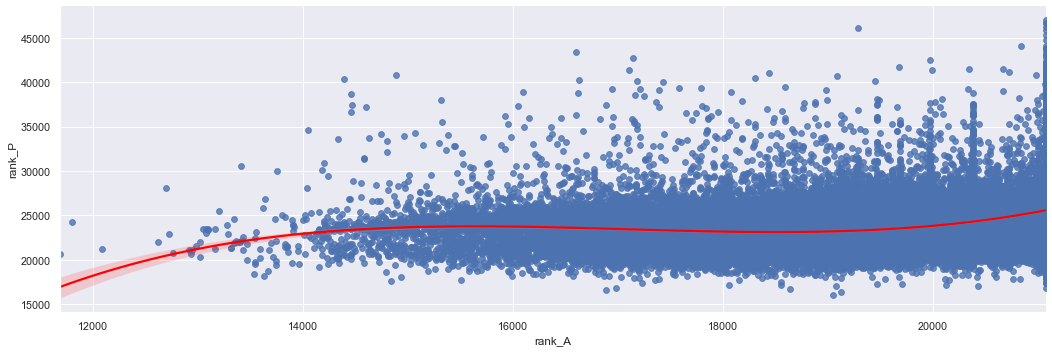

In [124]:
print(paper_G['rank_A'].corr(paper_G['rank_P']))
sns.lmplot(x='rank_A',y='rank_P',aspect=3,data=paper_G,order=3,line_kws={'color': 'red'},fit_reg=True);  
#,hue='fos_list'

[2.30318433e-05 9.64256545e+00]


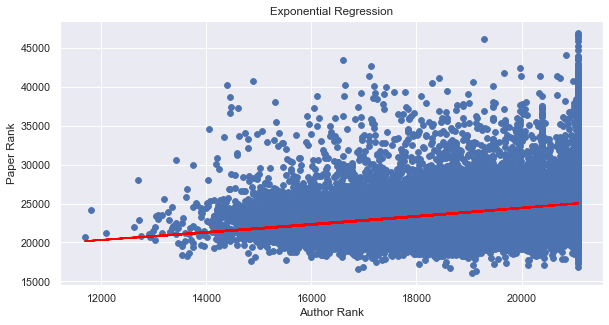

In [125]:
import math as m
fit = np.polyfit(paper_G.rank_A, np.log(paper_G.rank_P), 1)
print(fit)

y = []
for x in paper_G.rank_A.unique():
    value = m.exp(9.64256545e+00) * m.exp(2.30318433e-05)**x
    y.append(value)

fig = plt.figure(figsize = (10, 5))
plt.scatter(paper_G.rank_A,paper_G.rank_P)
plt.plot(paper_G.rank_A.unique(), y,color ='red');
plt.ylabel('Paper Rank')
plt.xlabel('Author Rank')
plt.title("Exponential Regression")
plt.show()

In [126]:
paper_G.head()

,entity_id,rank_P,referenceCount_P,citationCount_P,dcterms_creator,rank_A,paperCount_A,citationCount_A,Paper_Auth_Num,Cite_per_P,fos_list
0,6320,24657,1,0,2.700171e+09,21021.0,45.0,792.0,1,17.600000,Medicine
1,40690,27152,0,0,2.212853e+09,21075.0,1.0,0.0,1,0.000000,Biology
2,47840,23416,0,1,2.151890e+09,14571.0,268.0,2701.0,1,10.078358,Materials science
3,139580,24050,5,0,1.852443e+09,21075.0,328.0,5818.0,1,17.737805,Medicine
4,184210,25659,0,0,2.634262e+09,20381.0,2.0,0.0,1,0.000000,Physics


In [129]:
paper_data.groupby("fos_list").agg({'Paper_Auth_Num': ['mean', 'min', 'max','std','count']})

Paper_Auth_Num                          
                                mean min  max        std count
fos_list                                                      
Art                         1.483561   1   44   1.384313  5627
Biology                     2.451885   1   37   2.107843  2255
Business                    1.824378   1   56   1.450312  4783
Chemistry                   3.154461   1  374  10.090733  1502
Computer science            1.870896   1   13   1.366083  3168
Economics                   1.534331   1   19   1.166413  1937
Engineering                 1.818925   1   17   1.509011   856
Environmental science       2.424774   1   46   2.173767  6959
Geography                   2.051779   1   26   1.837287  4693
Geology                     2.798874   1   45   2.242978  3908
History                     1.518837   1   23   1.371559  3371
Materials science           2.896579   1   27   2.074934  3858
Mathematics                 2.104890   1   51   1.837247  2679
Medicine                    2.932968   1  104   3.231823  2372
Philosophy                  1.440324   1   27   1.334493  2346
Physics                     2.342625   1  151   5.975330   861
Political science           1.569544   1   14   1.158748   834
Psychology                  1.602712   1   13   1.272075  1475
Sociology                   1.711175   1   28   1.542381  2434

In [128]:
paper_data.groupby("fos_list").agg({'rank_P': ['mean', 'min', 'max','std','count']})

rank_P                                 
                               mean    min    max          std count
fos_list                                                            
Art                    25462.131153  17537  46635  3143.769903  5627
Biology                24552.960976  17118  41398  2477.455760  2255
Business               24078.131298  16085  43019  2654.159460  4783
Chemistry              24451.298935  16803  40441  2673.162340  1502
Computer science       24324.984533  16350  44799  2364.173257  3168
Economics              24751.391843  17081  38419  2679.885715  1937
Engineering            24496.975467  18024  38098  2426.712073   856
Environmental science  24443.543469  16745  41617  2748.988781  6959
Geography              25129.494353  18593  46990  2702.318490  4693
Geology                23613.236950  16785  41102  2827.611043  3908
History                25550.791457  18310  46110  3267.898714  3371
Materials science      23353.739502  17769  36808  2440.026840  3858
Mathematics            23799.088466  18113  40081  2500.906156  2679
Medicine               23878.656408  18407  37833  2303.078763  2372
Philosophy             25877.067349  18034  46622  2691.437066  2346
Physics                25121.760743  18920  39646  2699.344137   861
Political science      24816.492806  17093  41628  2708.364527   834
Psychology             25119.364068  17858  40815  2449.592443  1475
Sociology              24064.498767  17620  37718  2807.047248  2434

In [134]:
import pandas as pd, numpy as np

bins = [0, 2, np.inf]
names = ['One Author', 'Two or More']

d = dict(enumerate(names, 1))

paper_data['group'] = np.vectorize(d.get)(np.digitize(paper_data['Paper_Auth_Num'], bins))
paper_data.head()

,entity_id,rank_P,referenceCount_P,citationCount_P,dcterms_creator,rank_A,paperCount_A,citationCount_A,Paper_Auth_Num,Cite_per_P,fos_list,group
0,6320,24657,1,0,2.700171e+09,21021.0,45.0,792.0,1,17.600000,Medicine,One Author
1,40690,27152,0,0,2.212853e+09,21075.0,1.0,0.0,1,0.000000,Biology,One Author
2,47840,23416,0,1,2.151890e+09,14571.0,268.0,2701.0,1,10.078358,Materials science,One Author
3,139580,24050,5,0,1.852443e+09,21075.0,328.0,5818.0,1,17.737805,Medicine,One Author
4,184210,25659,0,0,2.634262e+09,20381.0,2.0,0.0,1,0.000000,Physics,One Author


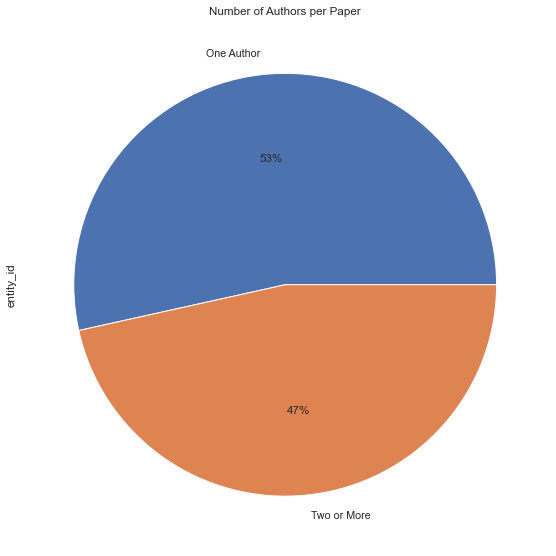

In [135]:
#dft_subset2 =  dft[dft['Value'] > threshold]
        
paper_data.groupby(['group']).sum().plot(kind='pie', y='entity_id',figsize=(10,10),legend=False,autopct='%1.0f%%',
                                              title="Number of Authors per Paper");
#Almost half of papers are written by one or two authors

In [165]:
paper_data['rank_A'] = paper_data['rank_A'].astype(int)
paper_data.info()
paper_data.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55918 entries, 0 to 117362
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   entity_id         55918 non-null  int64  
 1   rank_P            55918 non-null  int32  
 2   referenceCount_P  55918 non-null  int64  
 3   citationCount_P   55918 non-null  int64  
 4   dcterms_creator   55918 non-null  float64
 5   rank_A            55918 non-null  int32  
 6   paperCount_A      55918 non-null  float64
 7   citationCount_A   55918 non-null  float64
 8   Paper_Auth_Num    55918 non-null  int64  
 9   Cite_per_P        55918 non-null  float64
 10  fos_list          55918 non-null  object 
 11  group             55918 non-null  object 
dtypes: float64(4), int32(2), int64(4), object(2)
memory usage: 7.1+ MB


(55918, 12)

In [22]:
index = paper_data.fos_list.unique();
#ax = paper_data.plot.bar(rot=30, title="Paper Rank by Subject and Authors", figsize=(18,8));
#ax.set_ylim([21000,27000])

#plt.show(block=True);

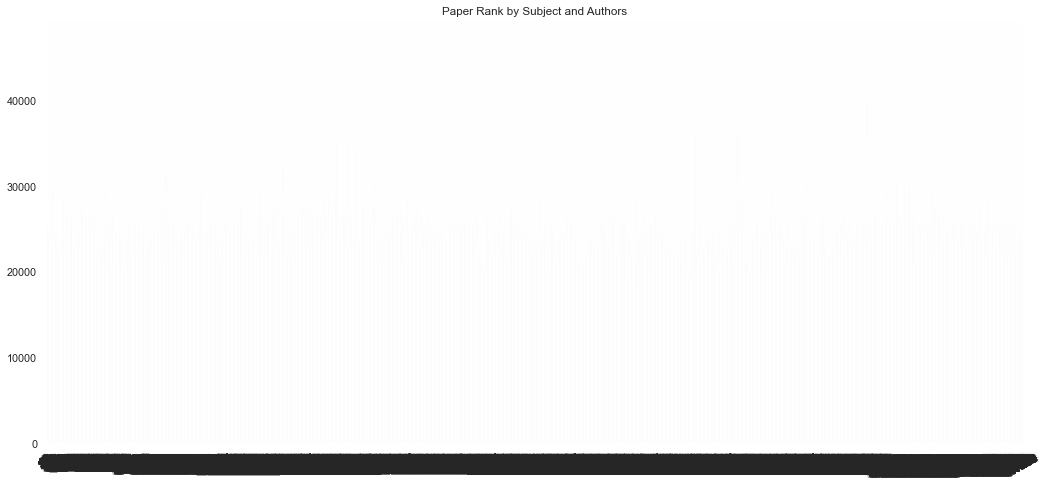

In [23]:
ax = paper_data['rank_P'].plot.bar(rot=30, title="Paper Rank by Subject and Authors", figsize=(18,8));

In [ ]:
#bar = paper.groupby(['fos_list', 'group']).agg(mean_rank_P=("rank_P", 'mean'))
bar = paper_data.groupby(['fos_list', 'group']).agg({'rank_P': ['mean','std']})
bar = bar.reset_index()
  
# plot barplot
fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(20, 5)
ax = sns.barplot(x="fos_list", y="rank_P", hue="group", data=paper_data, capsize=0.75,ci = "std");
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30);
ax.set(ylim=(21000, 27000))

plt.title("Paper Rank per Author Number", fontsize = 20);
plt.xlabel("Field of Study", fontsize = 15);
plt.ylabel("Mean Paper Rank", fontsize = 15);

In [ ]:
fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(15, 8)
ax = sns.barplot(x = "fos_list", y = "rank_P",data = journal1, capsize=0.75,ci = "sd");
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30);
ax.set(ylim=(18000, 30000))


plt.title("Paper Rank per FOS Journal", fontsize = 20);
plt.xlabel("Field of Study", fontsize = 15);
plt.ylabel("Paper Rank", fontsize = 15);

In [32]:
#Find the different averages between having 1-2 authors or having 3 or more
paper_one = paper_data[(paper_data.Paper_Auth_Num <= 2)]
paper_more = paper_data[(paper_data.Paper_Auth_Num > 2)]
print("1-2 Author")
print(paper_one.agg({'rank_P': ['mean', 'min', 'max','std','count']}))
print("\n3 or more Authors")
print(paper_more.agg({'rank_P': ['mean', 'min', 'max','std','count']}))

1-2 Author
             rank_P
mean   25110.401225
min    16803.000000
max    46990.000000
std     2929.888010
count  19595.000000

3 or more Authors
             rank_P
mean   24229.074498
min    16085.000000
max    44799.000000
std     2697.127937
count  36323.000000


Still showing the less authors may be better?

In [33]:
# How about by Subject?
print("1-2 Author")
print(paper_one.groupby("fos_list").agg({'rank_P': ['mean','std','count']}))
print("\n3 or more Authors")
print(paper_more.groupby("fos_list").agg({'rank_P': ['mean','std','count']}))

1-2 Author
                             rank_P                   
                               mean          std count
fos_list                                              
Art                    25534.246897  3167.336125  2256
Biology                26249.430233  3586.595172    86
Business               24314.804145  2605.923497  1930
Chemistry              25216.071253  3151.787606   407
Computer science       25096.701342  2171.412585   298
Economics              25106.119355  2880.973942   310
Engineering            24845.444444  2424.396912    45
Environmental science  25031.665992  2856.955352  3461
Geography              25524.729250  2715.468839  3265
Geology                24147.735457  3061.125567   722
History                25867.660615  3298.728637  2148
Materials science      23513.956656  2513.988529   646
Mathematics            24032.603376  2523.074155   474
Medicine               26213.439394  3197.218364    66
Philosophy             26002.253024  2485.203768   992

In [53]:
one0 = (paper_one.groupby("fos_list").agg({'rank_P': ['mean']}))    #.rename_axis('subj').reset_index())
one0.columns = one0.columns.droplevel(0)
one = one0.rename(columns={"mean":"One or Two"})
one

more0 = (paper_more.groupby("fos_list").agg({'rank_P': ['mean']}))   #.rename_axis('subj').reset_index())
more0.columns = more0.columns.droplevel(0)
more = more0.rename(columns={"mean":"Three or More"})
more

diff = one.join(more)
diff

,One or Two,Three or More
fos_list,,
Art,25534.246897,25413.868585
Biology,26249.430233,24485.696634
Business,24314.804145,23918.026639
Chemistry,25216.071253,24167.041096
Computer science,25096.701342,24244.855052
Economics,25106.119355,24683.803934
Engineering,24845.444444,24477.639951
Environmental science,25031.665992,23861.641795
Geography,25524.729250,24225.823529


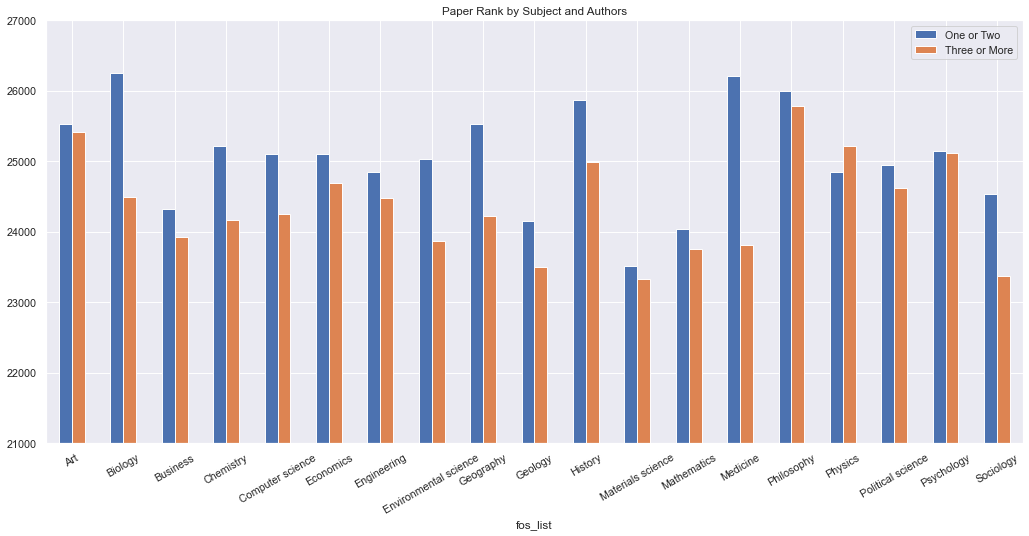

In [57]:
index = paper_data.fos_list.unique();
ax = diff.plot.bar(rot=30, title="Paper Rank by Subject and Authors", figsize=(18,8),
                   );
ax.set_ylim([21000,27000])

plt.show(block=True);

It does not seem like haing more authors to a paper helps that paper rank. The only thing positively correlted to paper rank is author rank. Next step is to see what helps an author.

In [ ]:
paper_one = paper_data[(paper_data.Paper_Auth_Num <= 2)]
paper_more = paper_data[(paper_data.Paper_Auth_Num > 2)]